# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [3]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [4]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [5]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [6]:
df_train.shape

(15223, 52)

In [7]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [8]:
df_test.shape

(14910, 52)

In [9]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [10]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [11]:
df = df_test.append(df_train).reset_index(drop=True)

In [12]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [14]:
categorical_columns_list = []
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        categorical_columns_list.append(df_train[i].name) #определим, если признак является категориальным, запишем его в лист
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку
        
# Выведем все категориальные признаки
print(categorical_columns_list)

EDUCATION
{'Среднее', 'Неполное среднее', 'Неоконченное высшее', 'Два и более высших образования', 'Среднее специальное', 'Ученая степень', 'Высшее'}


MARITAL_STATUS
{'Гражданский брак', 'Разведен(а)', 'Не состоял в браке', 'Состою в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Страхование', 'ЧОП/Детективная д-ть', 'Развлечения/Искусство', 'Информационные услуги', 'Недвижимость', 'Ресторанный бизнес/Общественное питание', 'Управляющая компания', 'Другие сферы', 'Сборочные производства', 'Логистика', 'Государственная служба', 'Строительство', 'Нефтегазовая промышленность', 'Туризм', 'Маркетинг', 'Наука', 'Коммунальное хоз-во/Дорожные службы', 'Здравоохранение', 'Химия/Парфюмерия/Фармацевтика', 'Транспорт', 'Банк/Финансы', 'Сельское хозяйство', 'Юридические услуги/нотариальные услуги', 'Салоны красоты и здоровья', 'Металлургия/Промышленность/Машиностроение', 'Образование', 'СМИ/Реклама/PR-агенства', 'Энергетика', 'Информационные технологии', 'Подбор персонала', 'Торговля'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [15]:
#df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

##### Ответ

In [16]:
# Пропуски в данных есть. Найдём их количество в каждом из столбцов, где они встречаются:
def find_calc_NaN(input_data):
    NaN_columns_count = 0
    for i in input_data.columns: # перебираем все столбцы
        if (input_data[input_data[i].isnull()].empty == False): # Проверим, есть ли пустые значения
            x = input_data[i].isnull().value_counts().to_dict()
            print('В столбце {} присутствует {} пустых значений'.format(input_data[i].name, x[True]))
            NaN_columns_count += 1
    if NaN_columns_count == 0:
        print('Пустые значения отсутствуют')
    return

find_calc_NaN(df)

В столбце GEN_INDUSTRY присутствует 2713 пустых значений
В столбце GEN_TITLE присутствует 2713 пустых значений
В столбце ORG_TP_STATE присутствует 2713 пустых значений
В столбце ORG_TP_FCAPITAL присутствует 2708 пустых значений
В столбце JOB_DIR присутствует 2713 пустых значений
В столбце TP_PROVINCE присутствует 590 пустых значений
В столбце REGION_NM присутствует 2 пустых значений
В столбце WORK_TIME присутствует 2717 пустых значений
В столбце PREVIOUS_CARD_NUM_UTILIZED присутствует 29533 пустых значений


Для столбцов: 
- GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR - можно заполнить значением "Не определено". Однако анализ показывает, что эти столбцы не заполнены у пенсионеров, поэтому заполним значениями:
'GEN_INDUSTRY': 'Не работает', 'GEN_TITLE': 'Пенсионер', 'ORG_TP_STATE': 'Пенсионер', 'ORG_TP_FCAPITAL': 'Без участия', 'JOB_DIR': 'Пенсионер'

Для столбцов: 
- TP_PROVINCE - можно попытаться заполнить на основе региона регистрации и признака REG_FACT_POST_TP_FL, а также иных признаков
- REGION_NM - можно заполнить на основе данных об адресах регистрации и проживания, а также признаков совпадения адресов, выбрав оттуда регион РФ
- WORK_TIME - надо сопоставлять с социальным статусом SOCSTATUS_WORK_FL и SOCSTATUS_PENS_FL. Если человек не работает, пенсионер, то можно поставить 0. Если работает, но не указан WORK_TIME, то также можно поставить 0.
- PREVIOUS_CARD_NUM_UTILIZED - в описании поля указано, что если пусто, то ноль (0).


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [17]:
# Выведем все категориальные признаки
print(categorical_columns_list)

['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', 'sample']


##### Ответ:
Да, есть категориальные признаки (см. запрос выше), однако часть из них не являются реальными категориальными признаками, т.к. содержат числовые значения, в которых использован неверный десятичный разделитель.

Реальные категориальные признаки: EDUCATION, MARITAL_STATUS, GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, REG_ADDRESS_PROVINCE, FACT_ADDRESS_PROVINCE, POSTAL_ADDRESS_PROVINCE, TP_PROVINCE, REGION_NM.
Поступать с ними можно двумя способами:
1. Удалить часть из них, если они не добавляют дополнительной ценности и/или дублируют друг друга полностью
2. Провести конвертацию в цифровые значения и нормализовать их так, чтобы не было явного перевеса одного значения над другим. Например, методом OneHotEncoding.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [166]:
from sklearn.preprocessing import OneHotEncoder

In [172]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    ## Your Code Here
    # Удалим идентификатор AGREEMENT_RK
    df_output.drop('AGREEMENT_RK', axis=1, inplace = True)
    
    # Заменим десятичные запятые на точки в полях сумм:
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    # Заменим отрицательное значение в FACT_LIVING_TERM
    df_output['FACT_LIVING_TERM'].where(df_output['FACT_LIVING_TERM']>=0, df_output['FACT_LIVING_TERM'].abs(), inplace = True)
    
    # Заполним пропуски
    # признак TP_PROVINCE заполняем адресом регистрации, для строк, где все адреса совпадают
    # Используем ~ в where, т.к. заменяет только значения, для которых cond = False
    df_output['TP_PROVINCE'].where(~(df_output['REG_FACT_POST_FL']==1 & df_output['TP_PROVINCE'].isnull()), \
                                   df_output['REG_ADDRESS_PROVINCE'], inplace = True)
    
    # для остальных случаев заполняем TP_PROVINCE на основе сравнения количества прожитых месяцев по фактическому адресу
    # с количеством выполненных платежей по кредиту. 
    # Если кол-во платежей меньше или равно кол-ва прожитых месяцев - кредит брался по фактическому адресу.
    # Используем ~ в where, т.к. заменяет только значения, для которых cond = False
    df_output['TP_PROVINCE'].where(~((df_output['REG_FACT_POST_FL']==0 & df_output['TP_PROVINCE'].isnull())\
           & (df_output['FACT_LIVING_TERM'] >= df_output['LOAN_NUM_PAYM'])), df_output['FACT_ADDRESS_PROVINCE'], inplace = True)
    
    # Иначе, если кол-во платежей больше кол-ва прожитых месяцев - кредит брался по адресу регистрации.
    # Используем ~ в where, т.к. заменяет только значения, для которых cond = False
    df_output['TP_PROVINCE'].where(~((df_output['REG_FACT_POST_FL']==0 & df_output['TP_PROVINCE'].isnull()) & \
        (df_output['FACT_LIVING_TERM'] < df_output['LOAN_NUM_PAYM'])), df_output['REG_ADDRESS_PROVINCE'], inplace = True)
    
    # признак утилизации карт заполняем нулём, как описано в описании полей
    # Заполняем поле WORK_TIME нулём, т.к. все записи с незаполненным полем принадлежат пенсионерам
    # Остальные незаполненные признаки заполняем указанными значениями, показывающими, что это неработающие пенсионеры
    values = {'PREVIOUS_CARD_NUM_UTILIZED': 0, 'REGION_NM': 'ЗАПАДНО-СИБИРСКИЙ', 'WORK_TIME': 0, 'GEN_INDUSTRY': 'Не работает',\
              'GEN_TITLE': 'Пенсионер', 'ORG_TP_STATE': 'Пенсионер', 'ORG_TP_FCAPITAL': 'Без участия', 'JOB_DIR': 'Пенсионер'}
    df_output.fillna(value = values, inplace = True)

    # определяем бинарные и оставшиеся категориальные признаки
    categorical_columns_list = []
    binary_features = {}
    for i in df_output.columns: # перебираем все столбцы
        if str(df_output[i].dtype) == 'object': # если тип столбца - object
            if df_output[i].name != 'sample':
                # Если признак бинарный, то определим его значения и установим для них числовые значения
                if len(df_output[i].value_counts()) == 2:
                    keys = df_output[i].value_counts().keys().tolist()
                    binary_features[df_output[i].name] = {keys[0]: 0, keys[1]: 1}
                else:
                    categorical_columns_list.append(df_output[i].name)
    
    # конвертируем значения в бинарных признаках
    for key, value in binary_features.items():
        df_output[key].replace(value, inplace = True)
#        print(df_output[key].value_counts())
        
    # кодируем категориальные признаки
    df_output = pd.get_dummies(df_output, columns=categorical_columns_list)
    
    return df_output

##### Примечание к подготовке данных
Вообще анализ данных показывает, что в них содержится существенное количество ошибок.
Например:
- в ряде записей некорректен признак REG_FACT_POST_FL. Т.е. несмотря на идентичность адресов признак имеет значение 0 - не совпадают.
- было отрицательное значение в FACT_LIVING_TERM (-26), обработал в preproc_data
- нереальные значения в FACT_LIVING_TERM, например, максимальное значение = 48 млн. месяцев
Наверняка таких ошибок в данных очень много, вероятно они внесены специально для усложнения условий конкурсного задания.

In [173]:
# Запустим подготовку данных
df_preproc = df.pipe(preproc_data)

In [175]:
# Проверим, что не осталось пустых значений в полученном после предподготовки датафрейме
find_calc_NaN(df_preproc)

Пустые значения отсутствуют


In [176]:
# разделим подготовленные данные на train и test
df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [177]:
y = df_train_preproc['TARGET']
y_test_real = df_test_preproc['TARGET'] # Использую постфикс _real т.к. далее y_test используется в train_test_split

# Из X удаляем значения TARGET, чтобы модель обучилась на основе прочих признаков
X = df_train_preproc.drop('TARGET', axis=1)
X_test_real = df_test_preproc.drop('TARGET', axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [178]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [179]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Your Code Here
# Используем Дерево принятия решений
model_DT = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])
model_DT.fit(X_train, y_train)
predict_DT = model_DT.predict(X_test)
predict_DT_proba = model_DT.predict_proba(X_test)

# Используем Случайный лес
model_RF = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])
model_RF.fit(X_train, y_train)
predict_RF = model_RF.predict(X_test)
predict_RF_proba = model_RF.predict_proba(X_test)

# Используем Логистическую регрессию
model_LR = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])
model_LR.fit(X_train, y_train)
predict_LR = model_LR.predict(X_test)
predict_LR_proba = model_LR.predict_proba(X_test)

In [180]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
# Параметры для Дерева принятия решений
accuracy_DT = accuracy_score(y_test, predict_DT)
prec_DT = precision_score(y_test, predict_DT)
recall_DT = recall_score(y_test, predict_DT)

# Параметры для Случайного леса
accuracy_RF = accuracy_score(y_test, predict_RF)
prec_RF = precision_score(y_test, predict_RF)
recall_RF = recall_score(y_test, predict_RF)

# Параметры для Логистической регрессии
accuracy_LR = accuracy_score(y_test, predict_LR)
prec_LR = precision_score(y_test, predict_LR)
recall_LR = recall_score(y_test, predict_LR)

print('Параметры для DecisionTreeClassifier: Accuracy={}, Precision={}, Recall={}'.format(accuracy_DT, prec_DT, recall_DT))
print('Параметры для RandomForestClassifier: Accuracy={}, Precision={}, Recall={}'.format(accuracy_RF, prec_RF, recall_RF))
print('Параметры для LogisticRegression: Accuracy={}, Precision={}, Recall={}'.format(accuracy_LR, prec_LR, recall_LR))

# Создадим словарь для хранения всех результатов:
predict_results = {}
predict_results = {'DecisionTree': [accuracy_DT, prec_DT, recall_DT], 
                   'RandomForest': [accuracy_RF, prec_RF, recall_RF],
                   'LogisticRegression': [accuracy_LR, prec_LR, recall_LR]
                  }

Параметры для DecisionTreeClassifier: Accuracy=0.8020582439238012, Precision=0.17013232514177692, Recall=0.16216216216216217
Параметры для RandomForestClassifier: Accuracy=0.8756295160937158, Precision=0.21739130434782608, Recall=0.009009009009009009
Параметры для LogisticRegression: Accuracy=0.8736588570177359, Precision=0.2608695652173913, Recall=0.021621621621621623


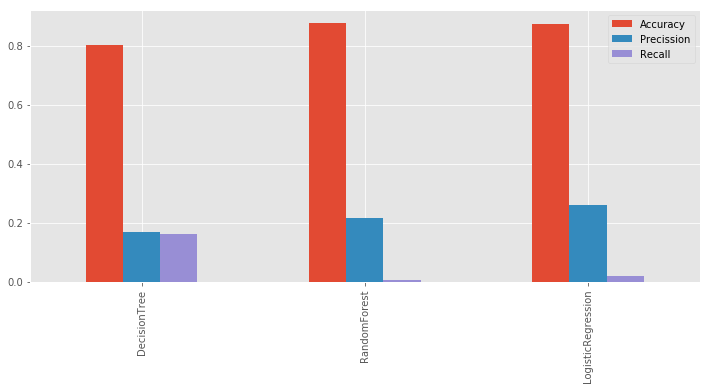

In [181]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here
pd.DataFrame.from_dict(predict_results, orient='index', columns=['Accuracy', 'Precission', 'Recall']).plot(kind='bar')

### Комментарий к показателям
Очень маленький Recall, хорошо бы разобраться, почему такое низкое значение.
Я пока так и не понял, почему так происходит.

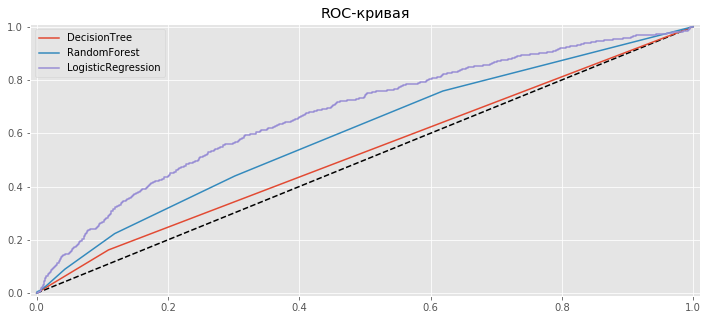

ROC_AUC: DecisionTree = 0.5263702136832746, RandomForest = 0.5994619744370492, LogisticRegression = 0.6758476821786892


In [182]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой модели
# Подпишите оси и линии

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve, auc
plt.ylabel='TPR'
plt.xlabel='FPR'
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.grid=True
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], 'k--')

fpr, tpr, thresholds = roc_curve(y_test, predict_DT_proba[:, 1])
plt.plot(fpr, tpr, label = 'DecisionTree')


fpr, tpr, thresholds = roc_curve(y_test, predict_RF_proba[:, 1])
plt.plot(fpr, tpr, label = 'RandomForest')


fpr, tpr, thresholds = roc_curve(y_test, predict_LR_proba[:, 1])
plt.plot(fpr, tpr, label = 'LogisticRegression')

plt.legend()
plt.show()

roc_auc_DT = roc_auc_score(y_test, predict_DT_proba[:, 1])
roc_auc_RF = roc_auc_score(y_test, predict_RF_proba[:, 1])
roc_auc_LR = roc_auc_score(y_test, predict_LR_proba[:, 1])

print('ROC_AUC: DecisionTree = {}, RandomForest = {}, LogisticRegression = {}'.format(roc_auc_DT, roc_auc_RF, roc_auc_LR))

In [183]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
y_test = []
itog_val = {}
kfold = 10
scores_DT = cross_val_score(model_DT, X, y, cv = kfold, n_jobs = -1, scoring = 'roc_auc')
itog_val['DecisionTree'] = scores_DT.mean()
scores_RF = cross_val_score(model_RF, X, y, cv = kfold, n_jobs = -1, scoring = 'roc_auc')
itog_val['RandomForest'] = scores_RF.mean()
scores_LR = cross_val_score(model_LR, X, y, cv = kfold, n_jobs = -1, scoring = 'roc_auc')
itog_val['LogisticRegression'] = scores_LR.mean()

In [184]:
print(scores_DT)
print(scores_RF)
print(scores_LR)

[0.52187157 0.51336136 0.52911367 0.52508024 0.54562028 0.53150325
 0.51469177 0.53067308 0.54329868 0.55509412]
[0.58161715 0.56538503 0.60645556 0.57333523 0.57182526 0.60560067
 0.57731511 0.57634898 0.59365279 0.60804174]
[0.64858093 0.64813039 0.6654348  0.6331467  0.67773287 0.67971457
 0.70836063 0.71192851 0.6997664  0.66534828]


{'DecisionTree': 0.5310308016260935,
 'RandomForest': 0.5859577522162418,
 'LogisticRegression': 0.6738144076493693}

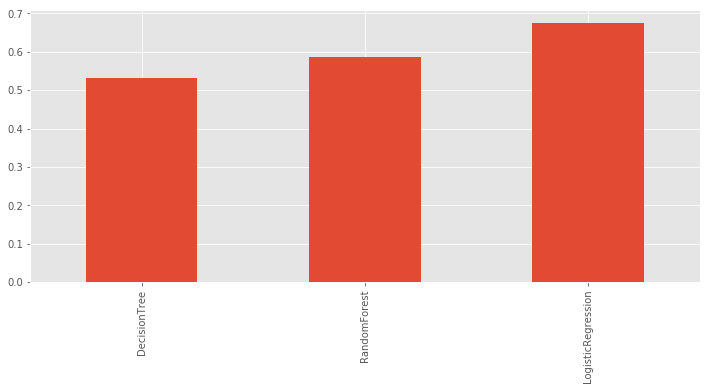

In [185]:
pd.DataFrame.from_dict(data = itog_val, orient='index').plot(kind='bar', legend=False)
itog_val

In [186]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

#predict = 
## Your Code Here
predict_LR_real = model_LR.predict(X_test_real)
predict_LR_real_proba = model_LR.predict_proba(X_test_real)

# На всякий случай сравним и другие модели
predict_DT_real = model_DT.predict(X_test_real)
predict_DT_real_proba = model_DT.predict_proba(X_test_real)

predict_RF_real = model_RF.predict(X_test_real)
predict_RF_real_proba = model_RF.predict_proba(X_test_real)

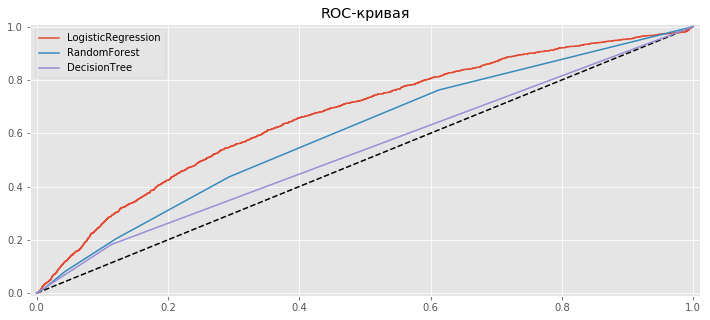

Параметры качества для Логистической регрессии:
ROC_AUC: 0.6680300911854102 Accuracy = 0.8779342723004695, Precission = 0.26973684210526316, Recall = 0.023428571428571427


In [187]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here
plt.ylabel='TPR'
plt.xlabel='FPR'
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.grid=True
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], 'k--')

fpr, tpr, thresholds = roc_curve(y_test_real, predict_LR_real_proba[:, 1])
plt.plot(fpr, tpr, label = 'LogisticRegression')

fpr, tpr, thresholds = roc_curve(y_test_real, predict_RF_real_proba[:, 1])
plt.plot(fpr, tpr, label = 'RandomForest')

fpr, tpr, thresholds = roc_curve(y_test_real, predict_DT_real_proba[:, 1])
plt.plot(fpr, tpr, label = 'DecisionTree')

plt.legend(loc = 'upper left')
plt.show()

# Параметры для Логистической регрессии
roc_auc = roc_auc_score(y_test_real, predict_LR_real_proba[:, 1])
accuracy_LR_real = accuracy_score(y_test_real, predict_LR_real)
prec_LR_real = precision_score(y_test_real, predict_LR_real)
recall_LR_real = recall_score(y_test_real, predict_LR_real)
print('Параметры качества для Логистической регрессии:')
print('ROC_AUC: {} Accuracy = {}, Precission = {}, Recall = {}'.format(roc_auc, accuracy_LR_real, prec_LR_real, recall_LR_real))

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [268]:
### И далее ;)

In [271]:
# какие значения региона для пропущеного REGION_NM исходя из региона адресов?
df[df['REGION_NM'].isnull()].loc[:,'REG_ADDRESS_PROVINCE':'TP_PROVINCE']

,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE
3099,Новосибирская область,Новосибирская область,Новосибирская область,Новосибирская область
17420,Новосибирская область,Новосибирская область,Новосибирская область,Новосибирская область


In [34]:
# Проверим регионы для записей, где все адреса совпадают по признаку REG_FACT_POST_FL
df[(df['REG_FACT_POST_FL']==1) & (df['TP_PROVINCE'].isnull())].loc[:,'REG_ADDRESS_PROVINCE':'TP_PROVINCE']

,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE
40,Московская область,Московская область,Московская область,NaN
67,Московская область,Московская область,Московская область,NaN
120,Московская область,Московская область,Московская область,NaN
315,Московская область,Московская область,Московская область,NaN
336,Московская область,Московская область,Московская область,NaN
534,Московская область,Московская область,Московская область,NaN
537,Москва,Москва,Москва,NaN
609,Москва,Москва,Москва,NaN
664,Московская область,Московская область,Московская область,NaN
961,Московская область,Московская область,Московская область,NaN


In [39]:
# Проверим для записей, где регионы в адресах не совпадают (по тому же признаку)
df[(df['TP_PROVINCE'].isnull()) & (df['REG_FACT_POST_FL']==0)]\
  .loc[:,['REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE',\
          'REG_FACT_POST_FL', 'FACT_LIVING_TERM', 'LOAN_NUM_PAYM', 'WORK_TIME']]

,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REG_FACT_POST_FL,FACT_LIVING_TERM,LOAN_NUM_PAYM,WORK_TIME
282,Московская область,Московская область,Московская область,NaN,0,48,4,96.0
731,Оренбургская область,Московская область,Московская область,NaN,0,12,6,36.0
1137,Московская область,Московская область,Московская область,NaN,0,156,5,60.0
1548,Архангельская область,Москва,Архангельская область,NaN,0,400,1,12.0
1783,Ярославская область,Московская область,Московская область,NaN,0,24,2,24.0
1814,Владимирская область,Московская область,Московская область,NaN,0,36,1,24.0
1985,Московская область,Москва,Москва,NaN,0,60,5,55.0
2093,Брянская область,Москва,Брянская область,NaN,0,12,5,12.0
2210,Волгоградская область,Москва,Волгоградская область,NaN,0,2,5,2.0
2216,Московская область,Московская область,Московская область,NaN,0,60,6,24.0


Обнаружили ошибку в исходных данных, которую надо отдельно обрабатывать в preproc

In [286]:
df[(df['REG_FACT_POST_FL']==0) & (df['TP_PROVINCE'].isnull()) & \
        (df['FACT_LIVING_TERM'] >= df['LOAN_NUM_PAYM'])].loc[:,['REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE',\
          'REG_FACT_POST_FL', 'FACT_LIVING_TERM', 'LOAN_NUM_PAYM', 'WORK_TIME']]
#        .fillna(df['FACT_ADDRESS_PROVINCE'])

,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REG_FACT_POST_FL,FACT_LIVING_TERM,LOAN_NUM_PAYM,WORK_TIME
282,Московская область,Московская область,Московская область,NaN,0,48,4,96.0
731,Оренбургская область,Московская область,Московская область,NaN,0,12,6,36.0
1137,Московская область,Московская область,Московская область,NaN,0,156,5,60.0
1548,Архангельская область,Москва,Архангельская область,NaN,0,400,1,12.0
1783,Ярославская область,Московская область,Московская область,NaN,0,24,2,24.0
1814,Владимирская область,Московская область,Московская область,NaN,0,36,1,24.0
1985,Московская область,Москва,Москва,NaN,0,60,5,55.0
2093,Брянская область,Москва,Брянская область,NaN,0,12,5,12.0
2216,Московская область,Московская область,Московская область,NaN,0,60,6,24.0
2220,Брянская область,Москва,Москва,NaN,0,12,5,16.0


In [287]:
    # Иначе, если кол-во платежей больше или равно кол-ву прожитых месяцев - кредит брался по адресу регистрации.
    df[(df['REG_FACT_POST_FL']==0) & (df['TP_PROVINCE'].isnull()) & \
        (df['FACT_LIVING_TERM'] < df['LOAN_NUM_PAYM'])].loc[:,['REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE',\
          'REG_FACT_POST_FL', 'FACT_LIVING_TERM', 'LOAN_NUM_PAYM', 'WORK_TIME']]
#        .fillna(df_output['REG_ADDRESS_PROVINCE'])

,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REG_FACT_POST_FL,FACT_LIVING_TERM,LOAN_NUM_PAYM,WORK_TIME
2210,Волгоградская область,Москва,Волгоградская область,NaN,0,2,5,2.0
2867,Орловская область,Московская область,Орловская область,NaN,0,2,5,5.0
4661,Московская область,Московская область,Московская область,NaN,0,2,5,108.0
6426,Владимирская область,Московская область,Московская область,NaN,0,4,10,48.0
7318,Тюменская область,Тюменская область,Тюменская область,NaN,0,2,4,5.0
12538,Волгоградская область,Москва,Волгоградская область,NaN,0,3,4,1.0
18778,Коми,Московская область,Московская область,NaN,0,1,11,30.0
19268,Северная Осетия,Московская область,Московская область,NaN,0,2,5,2.0
19661,Оренбургская область,Москва,Оренбургская область,NaN,0,3,5,36.0
27948,Челябинская область,Москва,Москва,NaN,0,4,7,2.0


In [307]:
values = {'WORK_TIME': 0, 'GEN_INDUSTRY': 'Не работает', 'GEN_TITLE': 'Пенсионер', 'ORG_TP_STATE': 'Пенсионер',\
              'ORG_TP_FCAPITAL': 'Без участия', 'JOB_DIR': 'Пенсионер'}

df[(df['WORK_TIME'].isnull()) & (df['SOCSTATUS_WORK_FL']==0) & (df['SOCSTATUS_PENS_FL']==1)]\
    .loc[:,['SOCSTATUS_PENS_FL', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'WORK_TIME']]\
    .fillna(value = values)

,SOCSTATUS_PENS_FL,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,WORK_TIME
1,1,Не работает,Пенсионер,Пенсионер,Без участия,Пенсионер,0.0
5,1,Не работает,Пенсионер,Пенсионер,Без участия,Пенсионер,0.0
8,1,Не работает,Пенсионер,Пенсионер,Без участия,Пенсионер,0.0
12,1,Не работает,Пенсионер,Пенсионер,Без участия,Пенсионер,0.0
20,1,Не работает,Пенсионер,Пенсионер,Без участия,Пенсионер,0.0
28,1,Не работает,Пенсионер,Пенсионер,Без участия,Пенсионер,0.0
30,1,Не работает,Пенсионер,Пенсионер,Без участия,Пенсионер,0.0
57,1,Не работает,Пенсионер,Пенсионер,Без участия,Пенсионер,0.0
77,1,Не работает,Пенсионер,Пенсионер,Без участия,Пенсионер,0.0
96,1,Не работает,Пенсионер,Пенсионер,Без участия,Пенсионер,0.0


In [305]:
df[(df['WORK_TIME'].isnull()) & (df['SOCSTATUS_WORK_FL']==0) & (df['SOCSTATUS_PENS_FL']==1) & (df['GEN_TITLE'].notnull())]\
    .loc[:,['SOCSTATUS_PENS_FL', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR']]

,SOCSTATUS_PENS_FL,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR
3149,1,Наука,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности
9382,1,Торговля,Специалист,Частная компания,Без участия,Участие в основ. деятельности
9854,1,Коммунальное хоз-во/Дорожные службы,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности
24757,1,Строительство,Специалист,Государственная комп./учреж.,NaN,Участие в основ. деятельности


In [465]:
for i in df_preproc.columns:
    print(df_preproc[i].name, df_preproc[i].min(), df_preproc[i].max())

TARGET 0 1
AGE 21 67
SOCSTATUS_WORK_FL 0 1
SOCSTATUS_PENS_FL 0 1
GENDER 0 1
CHILD_TOTAL 0 10
DEPENDANTS 0 7
ORG_TP_FCAPITAL 0 1
PERSONAL_INCOME 24.0 13000000.0
REG_FACT_FL 0 1
FACT_POST_FL 0 1
REG_POST_FL 0 1
REG_FACT_POST_FL 0 1
REG_FACT_POST_TP_FL 0 1
FL_PRESENCE_FL 0 1
OWN_AUTO 0 2
AUTO_RUS_FL 0 1
HS_PRESENCE_FL 0 1
COT_PRESENCE_FL 0 1
GAR_PRESENCE_FL 0 1
LAND_PRESENCE_FL 0 1
CREDIT 1843.0 150000.0
TERM 3 36
FST_PAYMENT 0.0 140000.0
DL_DOCUMENT_FL 0 0
GPF_DOCUMENT_FL 0 1
FACT_LIVING_TERM 0 48215880
WORK_TIME 0.0 2867959.0
FACT_PHONE_FL 0 1
REG_PHONE_FL 0 1
GEN_PHONE_FL 0 1
LOAN_NUM_TOTAL 1 11
LOAN_NUM_CLOSED 0 11
LOAN_NUM_PAYM 1 114
LOAN_DLQ_NUM 0 13
LOAN_MAX_DLQ 0 8
LOAN_AVG_DLQ_AMT 0.0 28012.2
LOAN_MAX_DLQ_AMT 0.0 28012.2
PREVIOUS_CARD_NUM_UTILIZED 0.0 2.0
sample test train
EDUCATION_Высшее 0 1
EDUCATION_Два и более высших образования 0 1
EDUCATION_Неоконченное высшее 0 1
EDUCATION_Неполное среднее 0 1
EDUCATION_Среднее 0 1
EDUCATION_Среднее специальное 0 1
EDUCATION_Ученая степен

FACT_ADDRESS_PROVINCE_Приморский край 0 1
FACT_ADDRESS_PROVINCE_Псковская область 0 1
FACT_ADDRESS_PROVINCE_Ростовская область 0 1
FACT_ADDRESS_PROVINCE_Рязанская область 0 1
FACT_ADDRESS_PROVINCE_Самарская область 0 1
FACT_ADDRESS_PROVINCE_Санкт-Петербург 0 1
FACT_ADDRESS_PROVINCE_Саратовская область 0 1
FACT_ADDRESS_PROVINCE_Сахалинская область 0 1
FACT_ADDRESS_PROVINCE_Свердловская область 0 1
FACT_ADDRESS_PROVINCE_Северная Осетия 0 1
FACT_ADDRESS_PROVINCE_Смоленская область 0 1
FACT_ADDRESS_PROVINCE_Ставропольский край 0 1
FACT_ADDRESS_PROVINCE_Тамбовская область 0 1
FACT_ADDRESS_PROVINCE_Татарстан 0 1
FACT_ADDRESS_PROVINCE_Тверская область 0 1
FACT_ADDRESS_PROVINCE_Томская область 0 1
FACT_ADDRESS_PROVINCE_Тульская область 0 1
FACT_ADDRESS_PROVINCE_Тюменская область 0 1
FACT_ADDRESS_PROVINCE_Удмуртия 0 1
FACT_ADDRESS_PROVINCE_Ульяновская область 0 1
FACT_ADDRESS_PROVINCE_Усть-Ордынский Бурятский АО 0 1
FACT_ADDRESS_PROVINCE_Хабаровский край 0 1
FACT_ADDRESS_PROVINCE_Хакасия 0 1
FA

In [463]:
df_train_preproc['FACT_LIVING_TERM'].value_counts()

36       596
24       591
12       498
60       495
48       472
120      470
72       425
84       423
96       416
108      409
240      317
180      273
156      261
144      253
132      251
168      240
216      210
204      208
192      206
252      204
228      191
6        188
264      184
300      178
276      148
1        144
288      127
18       127
3        123
360      115
        ... 
550        1
542        1
494        1
430        1
406        1
390        1
379        1
435        1
416        1
443        1
424        1
440        1
560        1
648        1
672        1
680        1
1000       1
2000       1
10220      1
6534       1
405        1
429        1
445        1
669        1
3228       1
3612       1
23916      1
7200       1
459        1
1831       1
Name: FACT_LIVING_TERM, Length: 482, dtype: int64

In [422]:
df[df['FACT_LIVING_TERM']==-26].loc[:, 'PERSONAL_INCOME':'LOAN_NUM_PAYM']

,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,...,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM
21156,23000,Приморский край,Приморский край,Приморский край,Приморский край,ДАЛЬНЕВОСТОЧНЫЙ,1,1,1,1,...,0,1,-26,288.0,1,0,1,1,0,4


In [456]:
df_preproc.loc[21156]

TARGET                                 0
AGE                                   56
SOCSTATUS_WORK_FL                      1
SOCSTATUS_PENS_FL                      0
GENDER                                 1
CHILD_TOTAL                            0
DEPENDANTS                             0
ORG_TP_FCAPITAL                        0
PERSONAL_INCOME                    23000
REG_FACT_FL                            1
FACT_POST_FL                           1
REG_POST_FL                            1
REG_FACT_POST_FL                       1
REG_FACT_POST_TP_FL                    1
FL_PRESENCE_FL                         1
OWN_AUTO                               0
AUTO_RUS_FL                            0
HS_PRESENCE_FL                         0
COT_PRESENCE_FL                        1
GAR_PRESENCE_FL                        0
LAND_PRESENCE_FL                       0
CREDIT                             98136
TERM                                  24
FST_PAYMENT                        40664
DL_DOCUMENT_FL  

In [ ]:
# Способ отделить целевое значение от прочих параметров
label = 'TARGET'
idx_features = df_train_preproc.columns != label
X = df_train_preproc.loc[:, idx_features].values
y = df_train_preproc.loc[:, ~idx_features].values.flatten()

X

In [142]:
df_test.TARGET.value_counts()

0    13160
1     1750
Name: TARGET, dtype: int64